# データサイエンス 第2回 

In [1]:
# 必要に応じて次の行のコメントアウトを解除し，ライブラリをインストールしてください
!pip install geopandas matplotlib numpy pandas pyserial requests japanize-matplotlib scikit-learn setuptools 

  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached matplotlib-3.10.6-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.3.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pandas-2.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pyserial-3.5-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached japanize_matplotlib-1.1.3-py3-none-any.whl
  Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached pyogrio-0.11.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (5.3 kB)
  Using cached pyproj-3.7.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (31 kB)
  Using cached shapely-2.1.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
%matplotlib inline

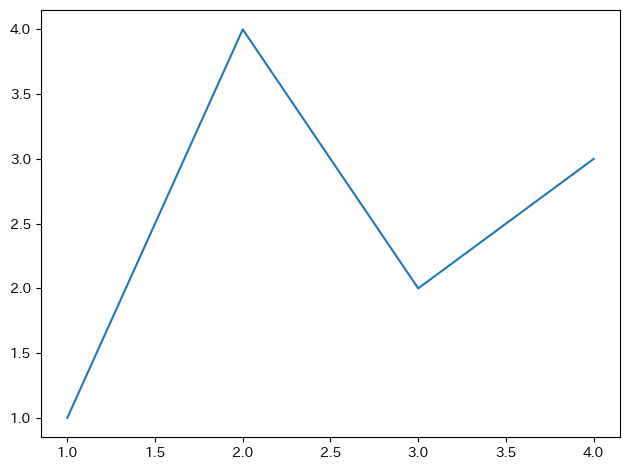

In [4]:
x = np.array([1, 2, 3, 4])   # 入力データ
y = np.array([1, 4, 2, 3])   # 出力データ

plt.figure()                 # 図を作成
plt.plot(x, y)               # 折れ線グラフを描画
plt.tight_layout()           # 余白の自動調整
plt.show()                   # 画面に表示

### 凡例とタイトルの表示
- `plt.legend()`関数で凡例を表示できる
  - `loc`で凡例の表示位置を設定
    - `upper right`:右上, `upper left`:左上, `lower right`:右下, `lower left`:左下
  - `fontsize`でフォントの大きさを指定
- `plt.title()`関数でグラフのタイトルを表示
  - `fontsize`でフォントの大きさを指定

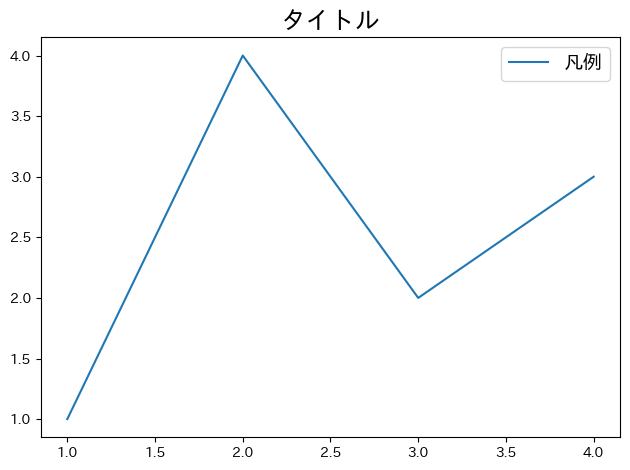

In [5]:
plt.figure()
plt.plot([1, 2, 3, 4], [1, 4, 2, 3], label="凡例")
plt.legend(loc="upper right", fontsize=14)
plt.title("タイトル", fontsize=18)
plt.tight_layout()
plt.show()

### 軸ラベルと目盛の設定
- `plt.xlabel()`関数で軸ラベルを表示
  - `fontsize`でフォントの大きさを指定
  - `labelpad`でラベルからグラフまでの距離を指定
- `plt.tick_params()`関数で目盛りのフォントサイズを指定

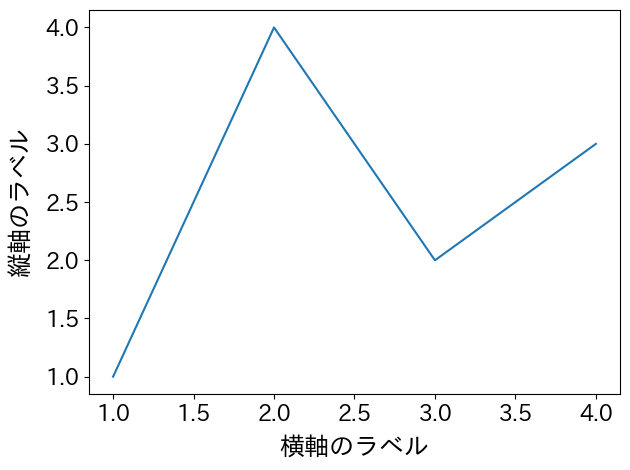

In [6]:
plt.figure()
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

plt.xlabel("横軸のラベル", fontsize=18, labelpad=8)
plt.ylabel("縦軸のラベル", fontsize=18, labelpad=8)

plt.tick_params(labelsize=16)
plt.tight_layout()
plt.show()


### 横軸および縦軸の最小値・最大値の設定

- `plt.xlim()` および `plt.ylim()` 関数で横軸および縦軸の最小値・最大値を指定
  - `plt.xlim(最小値, 最大値)`
  - `plt.ylim(最小値, 最大値)`


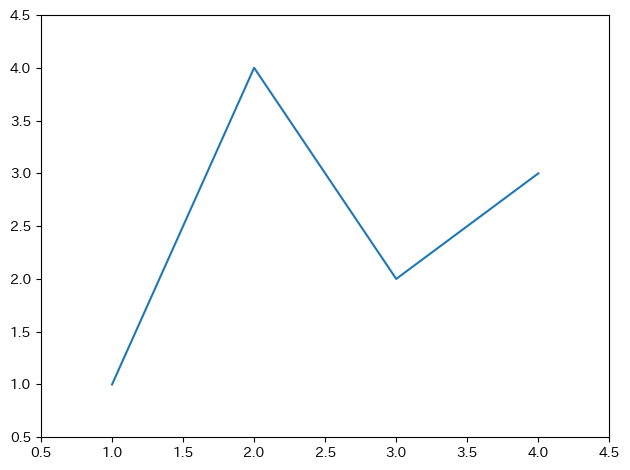

In [7]:
plt.figure()
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

plt.xlim(0.5, 4.5)
plt.ylim(0.5, 4.5)

plt.tight_layout()
plt.show()

### グラフのサイズ変更

- `plt.figure()`関数で`figsize`を指定
  - `figsize=(m, n)` とすることで、幅が`m`で高さが`n`の図が作成される

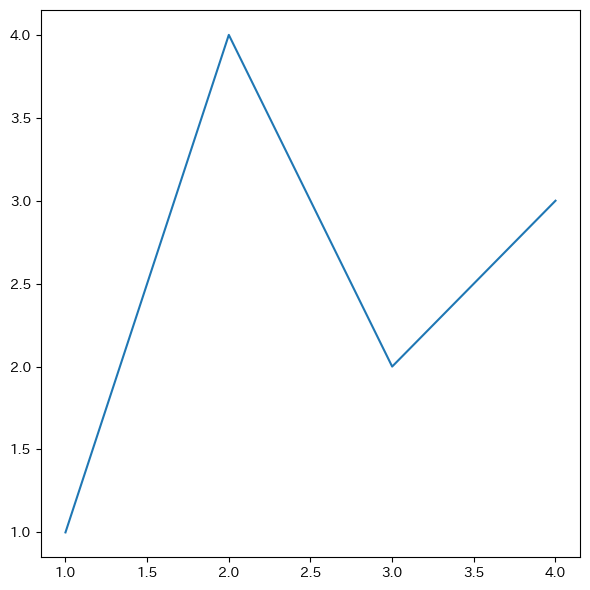

In [8]:
plt.figure(figsize=(6, 6))
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

plt.tight_layout()
plt.show()

### 複数の波形を描画
複数の波形を描画するときは`plt.plot()`を波形の数だけ書く

- 線の太さは`1`となる
- 線の色は自動で設定される
- マーカは表示されない
- 線の種類は実践となる

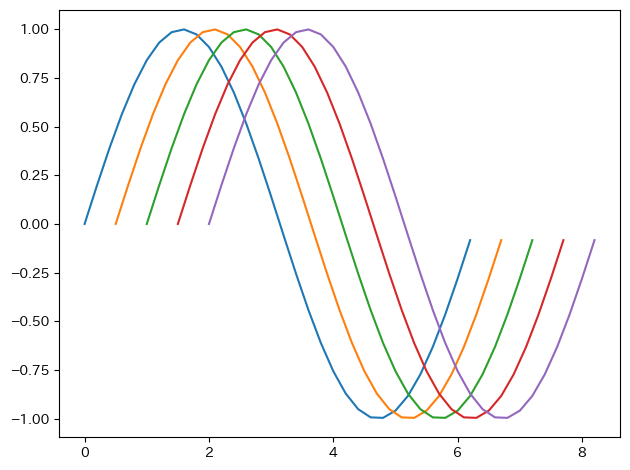

In [9]:
x = np.arange(0, 2*np.pi, 0.2)
y = np.sin(x)

plt.figure()
plt.plot(x    , y)
plt.plot(x+0.5, y)
plt.plot(x+1.0, y)
plt.plot(x+1.5, y)
plt.plot(x+2.0, y)

plt.tight_layout()
plt.show()

### 線の太さ

- `linewidth`で線の太さを指定

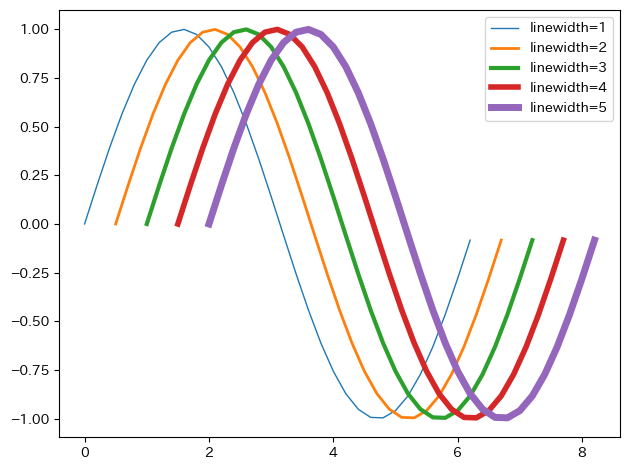

In [10]:
x = np.arange(0, 2*np.pi, 0.2)
y = np.sin(x)

plt.figure()
plt.plot(x    , y, linewidth=1, label="linewidth=1")
plt.plot(x+0.5, y, linewidth=2, label="linewidth=2")
plt.plot(x+1.0, y, linewidth=3, label="linewidth=3")
plt.plot(x+1.5, y, linewidth=4, label="linewidth=4")
plt.plot(x+2.0, y, linewidth=5, label="linewidth=5")

plt.legend()
plt.tight_layout()
plt.show()

### 線の色

- `color`で線の色を指定する
  - 文字列　`red`, `yellow`, `black`など
    - １文字（`r`, `y`, `k`など）の省略形がある
  - タプル　`(1.0, 0, 0)`: 赤, `(1.0, 0.7, 0)`: 黄, `(0, 0, 0)`: 黒 など
  - 16進数　`#FF0000`: 赤, `#FFB300`: 黄, `#000000`: 黒 など

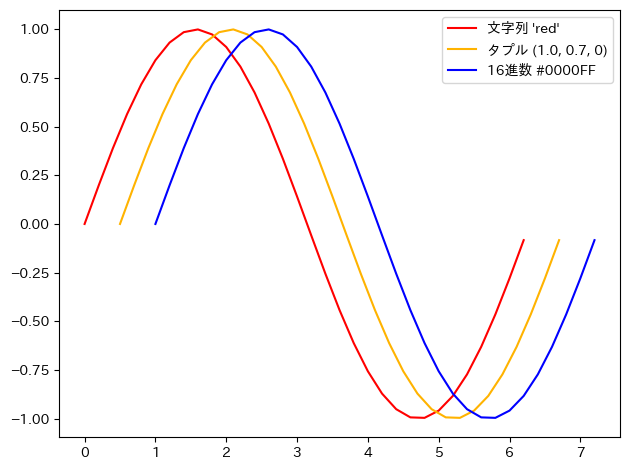

In [11]:
x = np.arange(0, 2*np.pi, 0.2)
y = np.sin(x)

plt.figure()
plt.plot(x    , y, color="red",         label="文字列 'red'")
plt.plot(x+0.5, y, color=(1.0, 0.7, 0), label="タプル (1.0, 0.7, 0)")
plt.plot(x+1.0, y, color="#0000FF",     label="16進数 #0000FF")

plt.legend()
plt.tight_layout()
plt.show()

### 線の種類

- `linestyle`で線の種類を指定
  - `-`: 実線, `--`: 点線, `:`: 点線, `-.`: 鎖線

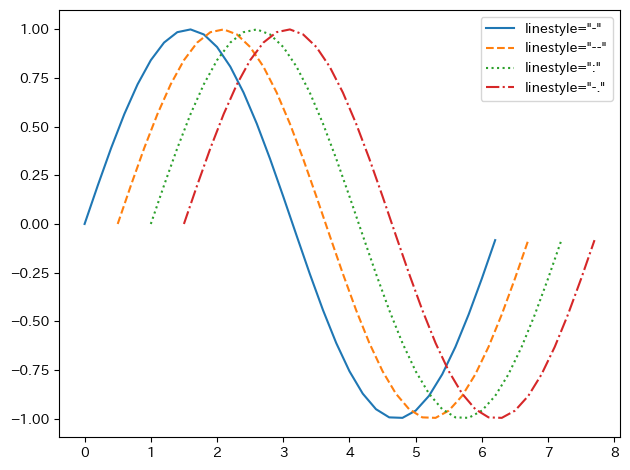

In [12]:
x = np.arange(0, 2*np.pi, 0.2)
y = np.sin(x)

plt.figure()
plt.plot(x    , y, linestyle="-",  label='linestyle="-"')
plt.plot(x+0.5, y, linestyle="--", label='linestyle="--"')
plt.plot(x+1.0, y, linestyle=":",  label='linestyle=":"')
plt.plot(x+1.5, y, linestyle="-.", label='linestyle="-."')

plt.legend()
plt.tight_layout()
plt.show()

### マーカの種類

- `marker`でマーカの種類を指定
  - `o`：丸, `^`：三角, `x`：バツ, `s`：四角, `s`：菱形

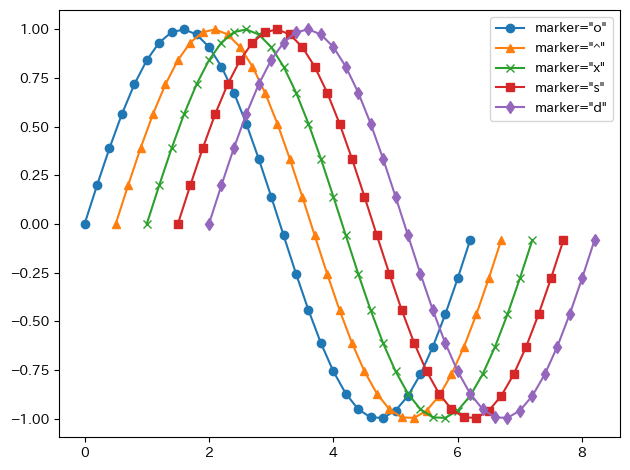

In [13]:
x = np.arange(0, 2*np.pi, 0.2)
y = np.sin(x)

plt.figure()
plt.plot(x    , y, marker="o", markersize=6, label='marker="o"')
plt.plot(x+0.5, y, marker="^", markersize=6, label='marker="^"')
plt.plot(x+1.0, y, marker="x", markersize=6, label='marker="x"')
plt.plot(x+1.5, y, marker="s", markersize=6, label='marker="s"')
plt.plot(x+2.0, y, marker="d", markersize=6, label='marker="d"')

plt.legend()
plt.tight_layout()
plt.show()

### 省略した書き方

- 第３引数に`線の色`,`マーカの種類`,`線の種類`をまとめて書くことができる
- 順番は自由に並べ変えて良い（`ko-`と`-ko`は同じ）

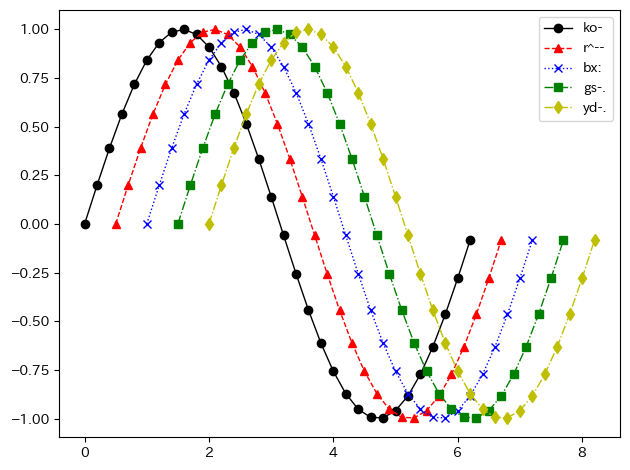

In [14]:
x = np.arange(0, 2*np.pi, 0.2)
y = np.sin(x)

plt.figure()
plt.plot(x    , y, "ko-",  linewidth=1, label="ko-")
plt.plot(x+0.5, y, "r^--", linewidth=1, label="r^--")
plt.plot(x+1.0, y, "bx:",  linewidth=1, label="bx:")
plt.plot(x+1.5, y, "gs-.", linewidth=1, label="gs-.")
plt.plot(x+2.0, y, "yd-.", linewidth=1, label="yd-.")

plt.legend()
plt.tight_layout()
plt.show()

### 各種グラフの描画例

### 折れ線グラフ
- `plt.plot(横軸の値, 縦軸の値, 追加のオプション)`

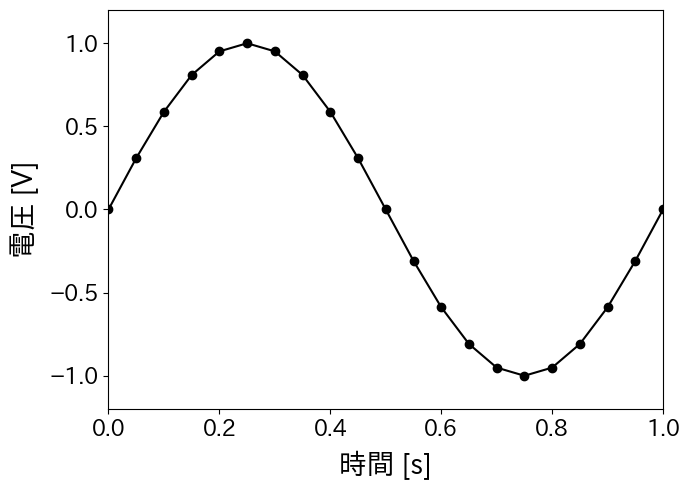

In [15]:
x = np.arange(0, 1.05, 0.05)
y = np.sin(2*np.pi*x)

plt.figure(figsize=(7, 5))
plt.plot(x, y, "ko-")
plt.ylim(-1.2, 1.2)
plt.xlim(0, 1)
plt.xlabel("時間 [s]", fontsize=20, labelpad=8)
plt.ylabel("電圧 [V]", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)

plt.tight_layout()
plt.show()

### 散布図

- `plt.scatter(横軸の値, 縦軸の値, 追加のオプション)`

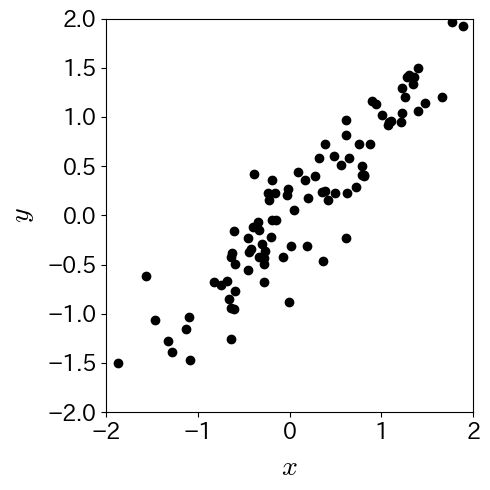

In [16]:
x = np.random.normal(0, 1, 100)
y = x + np.random.normal(0, 1, 100) * 0.3

plt.figure(figsize=(5, 5))
plt.scatter(x, y, c="black")
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.xlabel("$x$", fontsize=20, labelpad=8, math_fontfamily='cm')
plt.ylabel("$y$", fontsize=20, labelpad=8, math_fontfamily='cm')
plt.tick_params(labelsize=16)

plt.tight_layout()
plt.show()

### ヒストグラム

- `plt.hist(data, bins, 追加のオプション)`
  - `data`: ヒストグラムを作成するためのデータ
  - `bins`: ヒストグラムのビン（棒）の数を指定（デフォルトは10）
  - `ec`: グラフの枠線の色を指定（オプション）

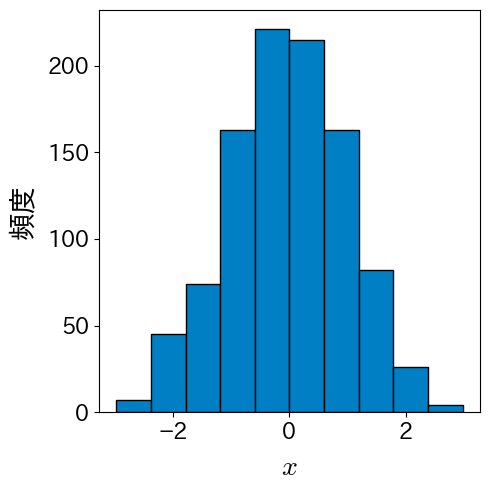

In [17]:
x = np.random.normal(0, 1, 1000)

plt.figure(figsize=(5, 5))
plt.hist(x, bins=10, color="#007FC5", ec="black")
plt.xlabel("$x$", fontsize=20, labelpad=8, math_fontfamily='cm')
plt.ylabel("頻度", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)

plt.tight_layout()
plt.show()

### 棒グラフ

- `plt.bar(categories, values, 追加のオプション)`
  - `categories`: 横軸に表示するカテゴリのリスト
  - `values`: 縦軸に表示する各カテゴリの値

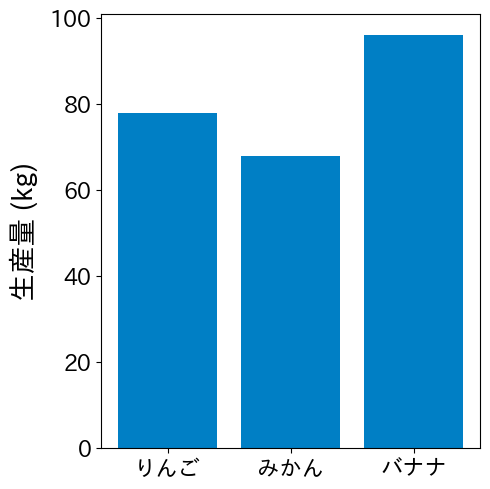

In [18]:
categories = ["りんご", "みかん", "バナナ"]
values = [78, 68, 96]

plt.figure(figsize=(5, 5))
plt.bar(categories, values, color="#007FC5")
plt.ylabel("生産量 (kg)", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)

plt.tight_layout()
plt.show()

### 円グラフ

- `plt.pie(x, values, 追加のオプション)`
  - `x`: 円グラフの各セクションの大きさを指定するリスト
  - `labels`: 各セクションに対応するラベルを指定するリスト
  - `colors`: セクションごとの色を指定するリスト
- さらに`startangle=90`, `counterclock=False`を設定することで円グラフの開始角度を12時方向とし，反時計回りに順番に表示させる

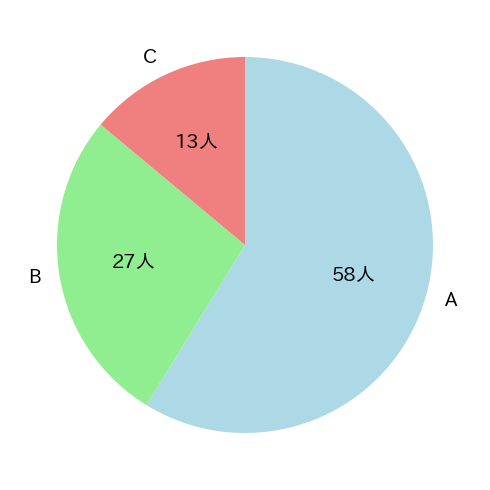

In [19]:
counts = [97, 45, 23]
labels = ['A', 'B', 'C']
colors = ['lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%d人',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 14},
)
plt.tight_layout()
plt.show()

### 箱ひげ図

- `plt.boxplot(data)`
  - `data`: ボックスプロットを作成するためのデータ（リストや配列で指定）
  - `medianprops`: 中央値の
    - `dict(linestyle="-", color="black")`と指定すれば黒の実線

/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_48224/1085379605.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(points, labels=("数学", "英語"),


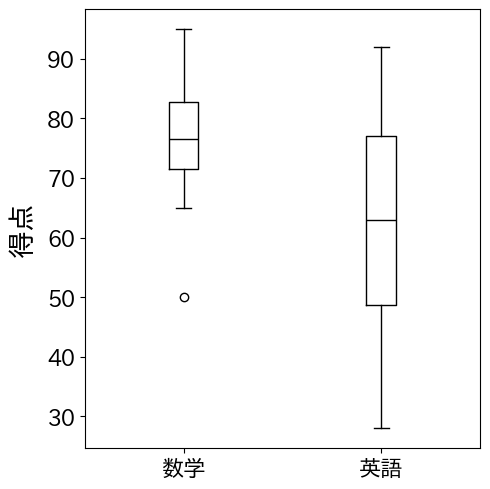

In [20]:
math    = [82, 75, 50, 73, 65, 95, 78, 93, 71, 83]
english = [77, 92, 62, 77, 64, 45, 28, 60, 37, 86]
points = (math, english)

plt.figure(figsize=(5, 5))
plt.boxplot(points, labels=("数学", "英語"),
            medianprops=dict(linestyle="-", color="black"))
plt.ylabel("得点", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)

plt.tight_layout()
plt.show()

### ヒートマップ

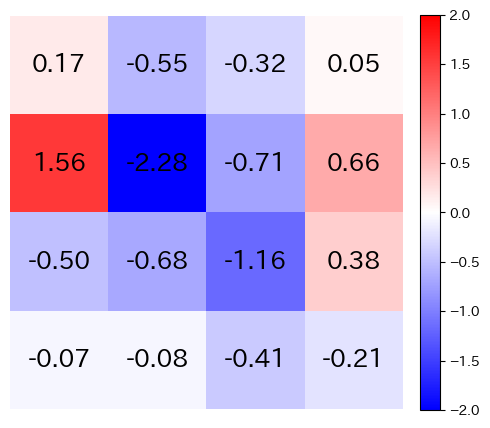

In [21]:
plt.figure(figsize=(5, 5))
data = np.random.normal(0, 1, (4, 4))

im = plt.imshow(data, vmin=-2, vmax=2, cmap="bwr")
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        plt.text(j, i, f"{data[i, j]:.2f}", ha="center", va="center",
                 color="k", fontsize=18)

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.axis("off")
plt.tight_layout()
plt.show()

<span style="font-size: 20px; color: #F08000;">問題1</span>

以下のプログラムで生成されるデータをグラフにまとめよ
必要であれば、スライドに記載のコードを参照しても良い

```py
title = "都道府県別コメの年間消費量（kg）"
labels = ["北海道", "東京都", "千葉県", "大阪府", "福岡県"]
values = [87.7, 59.3, 65.5, 75.2, 70.8]
``` 

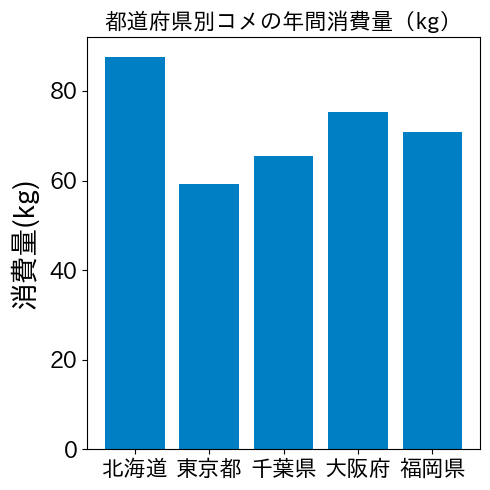

In [25]:
##############################
# 問題1のコードを記入
title = "都道府県別コメの年間消費量（kg）"
labels = ["北海道", "東京都", "千葉県", "大阪府", "福岡県"]
values = [87.7, 59.3, 65.5, 75.2, 70.8]

plt.figure(figsize=(5,5))
plt.bar(labels,values,color="#007FC5")
plt.ylabel("消費量(kg)",fontsize=20,labelpad=8)
plt.title(title,fontsize=16)
plt.tick_params(labelsize=16)

plt.tight_layout()
plt.show()


##############################

## 応用事例

### 地図データの使用

In [26]:
# 地図データおよび人口データは下記リンクよりダウンロードした
# 国土交通省, 東京都 令和3年 (https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v3_0.html)
# 東京都, 東京都の人口（推計）令和6年(2024年)1月 (https://www.toukei.metro.tokyo.lg.jp/jsuikei/js-index2.htm)

import geopandas as gpd

geo = gpd.read_file('data/02/N03-20210101_13_GML/N03-21_13_210101.geojson')
df1 = geo.dissolve(by="N03_007")[:-9][["geometry", "N03_004"]]
df1.set_index("N03_004", inplace=True)

data = pd.read_csv("data/02/js241v0000_1.csv", encoding="utf-8")
df2 = data[["地域", "人口／総数", "人口密度（1ｋm2当たり）"]]
df2.set_index("地域", inplace=True)

geodata = pd.merge(df1, df2, left_index=True, right_index=True)

plt.figure(figsize=(8, 4))
ax = geodata.plot(column="人口密度（1ｋm2当たり）", legend=True)

# カラーバー（右側の軸）にラベルを追加
cb_ax = plt.gcf().axes[-1]
cb_ax.text(-2, geodata["人口密度（1ｋm2当たり）"].max() * 1.02, "人口密度（1km$^2$当たり）")

# 地図側の軸を非表示
plt.sca(ax)
plt.axis("off")

plt.tight_layout()
plt.show()

DataSourceError: data/02/N03-20210101_13_GML/N03-21_13_210101.geojson: No such file or directory

### 多次元データの可視化

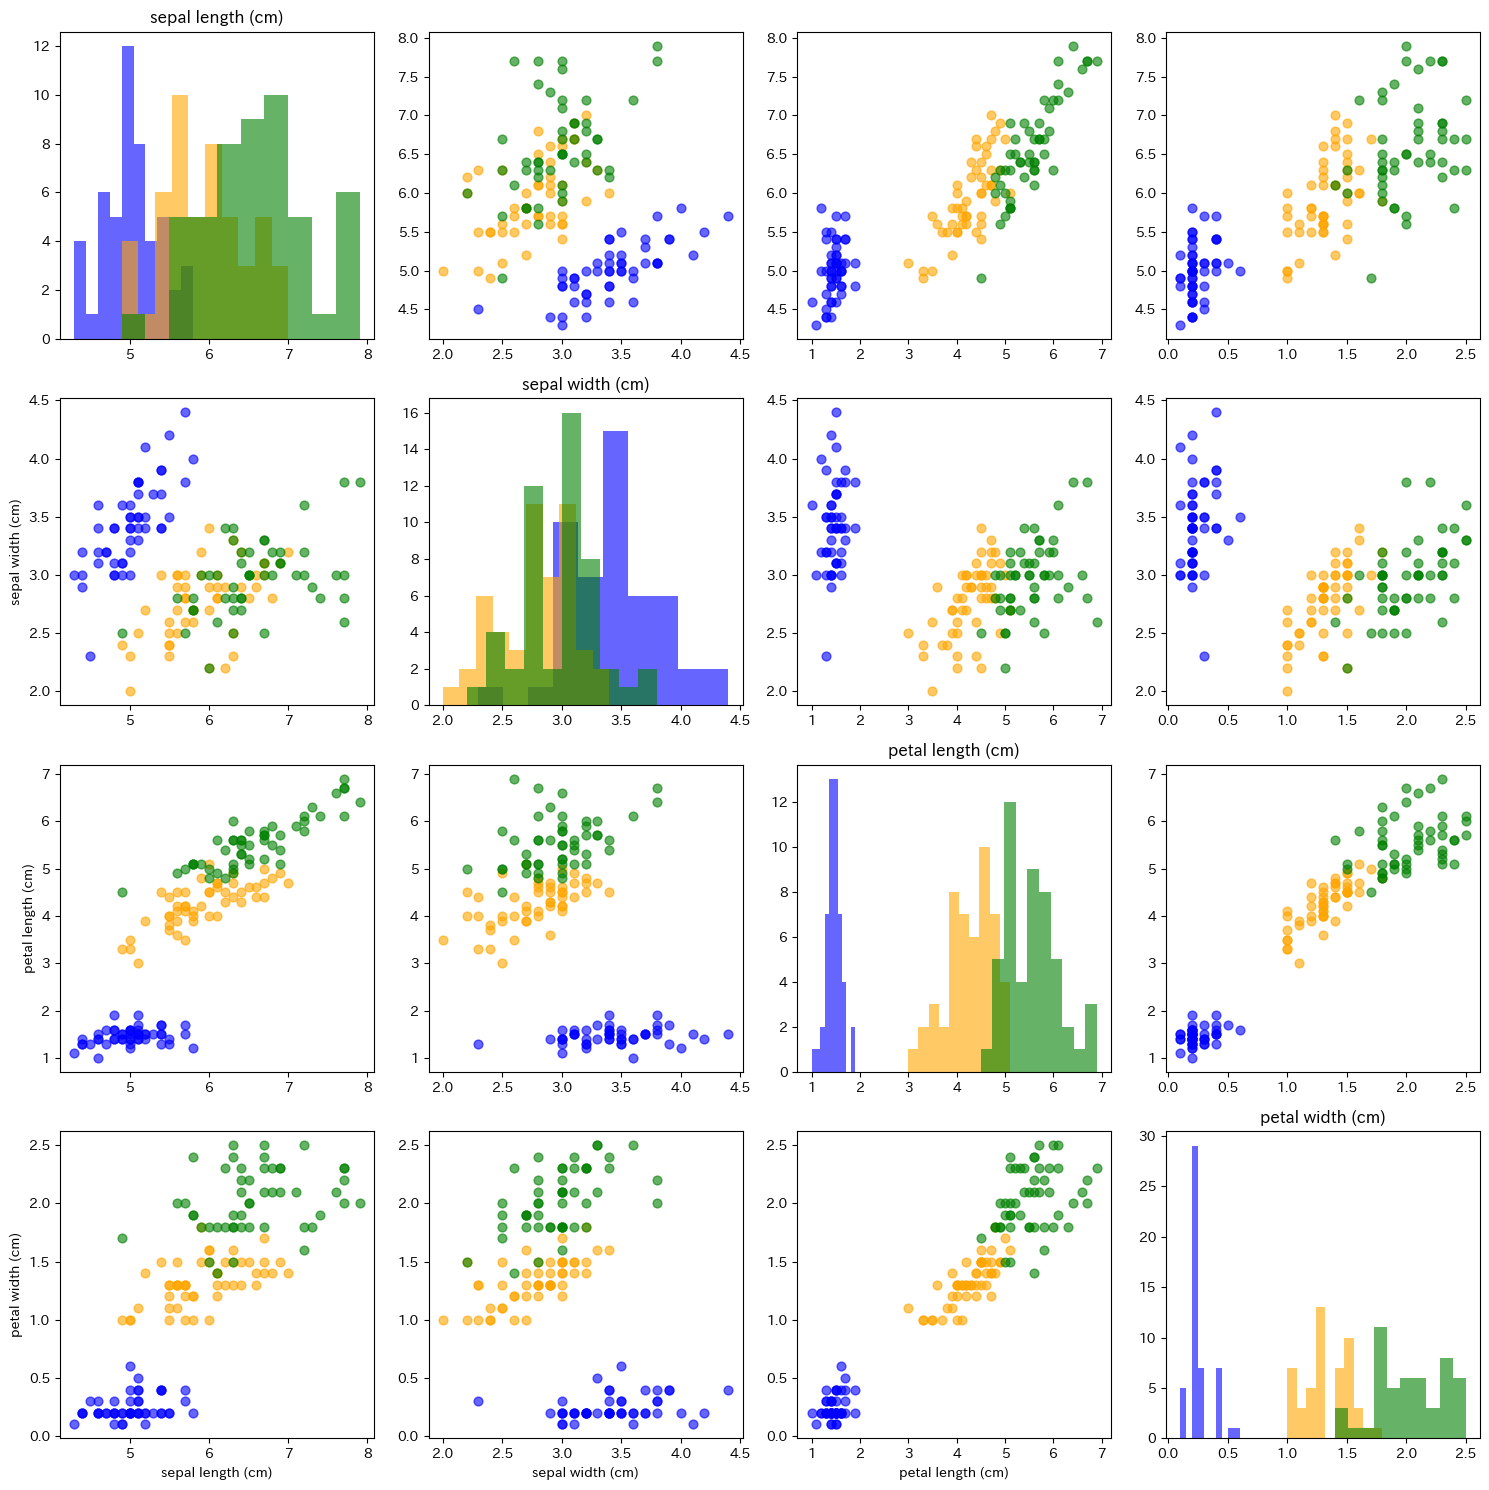

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.lines import Line2D

# データ読み込み
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names
colors = ['blue', 'orange', 'green']

# pyplot形式
plt.figure(figsize=(15, 15))

for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        if i == j:
            # ヒストグラム
            for label, color, name in zip(np.unique(y), colors, class_names):
                plt.hist(X[y == label, i], bins=10, alpha=0.6, color=color, label=name)
            plt.title(feature_names[i])
        else:
            # 散布図
            for label, color, name in zip(np.unique(y), colors, class_names):
                plt.scatter(X[y == label, j], X[y == label, i],
                            color=color, alpha=0.6, label=name, s=40)
            if i == 3:
                plt.xlabel(feature_names[j])
            if j == 0:
                plt.ylabel(feature_names[i])

plt.tight_layout()
plt.show()


## 応用事例
### 応用事例　CSVデータの利用
- データの読み込みにはpandasの`read_csv`関数を用いた
  -  厚生労働省の[オープンデータ](https://www.mhlw.go.jp/stf/covid-19/open-data.html)を利用した

In [ ]:
import matplotlib.dates as mdates

df = pd.read_csv("data/02/newly_confirmed_cases_daily.csv")
confirmed_cases = df["ALL"].values
date = pd.to_datetime(df["Date"].values)

plt.figure(figsize=(10, 6))
plt.plot(date, confirmed_cases, color="black")
plt.xlim(date.min(), date.max())

plt.title("日本国内における新型コロナウイルス新規陽性者数の推移", fontsize=16, pad=8)
plt.xlabel("日付", fontsize=14, labelpad=8)
plt.ylabel("新規陽性者数(人)", fontsize=14, labelpad=8)
plt.tick_params(labelsize=12)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 7]))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.tight_layout()
plt.show()

### 応用事例　Web APIの利用（天気予報データの取得）

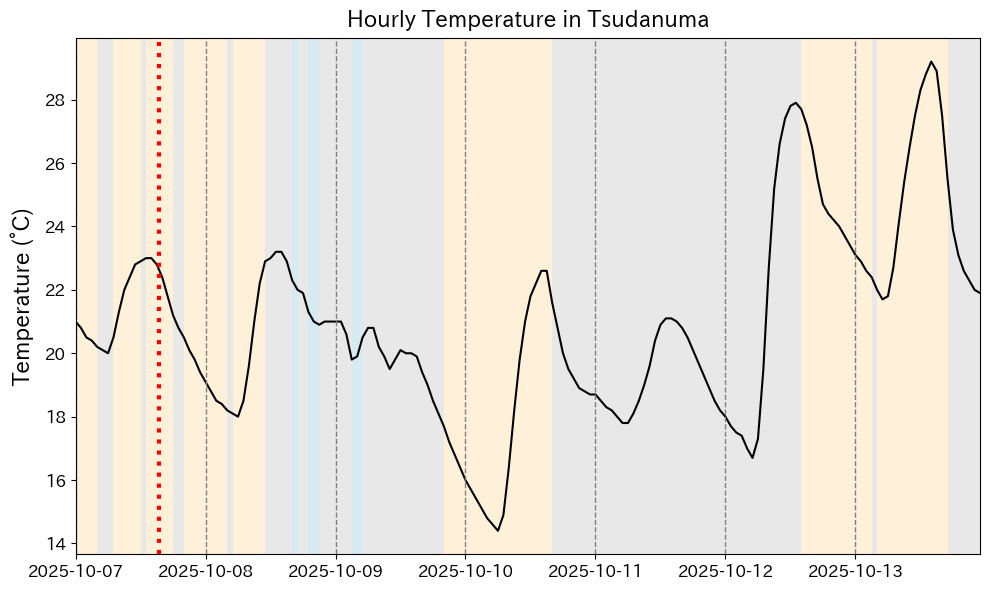

In [28]:
from datetime import datetime, timedelta
import requests

url = "https://api.open-meteo.com/v1/forecast"

params = {
    "latitude": 35.6919,                                # 津田沼の緯度
    "longitude": 140.0206,                              # 津田沼の経度
    "hourly": "temperature_2m,weathercode,cloudcover",  # 時間ごとの気温・天気コード・雲量
    "timezone": "auto"                                  # タイムゾーン自動
}

response = requests.get(url, params=params)

if response.status_code == 200:
    weather_data = response.json()

    from datetime import datetime
    times = [datetime.fromisoformat(t) for t in weather_data["hourly"]["time"]]
    temperatures = weather_data["hourly"]["temperature_2m"]
    weather_codes = weather_data["hourly"]["weathercode"]
    cloud_cover = weather_data["hourly"]["cloudcover"]

    plt.figure(figsize=(10, 6))
    plt.plot(times, temperatures, color="black")
    plt.axvline(datetime.now(), color="red", linestyle=":", linewidth=3.0)

    for i, (t, code, cloud) in enumerate(zip(times, weather_codes, cloud_cover)):
        color = "lightgrey"  # デフォルト（曇り）
        if cloud <= 50:      # 雲量が少ない（晴れ）
            color = "moccasin"
        elif code in [85, 86]:  # 雪
            color = "cornflowerblue"
        elif code in [51, 53, 55, 56, 57, 61, 63, 65, 66, 67, 71, 73, 75, 77, 80, 81, 82]:
            color = "lightblue"  # 降水
        plt.axvspan(times[i], times[i] + timedelta(hours=1), facecolor=color, alpha=0.5)

    for t in times:
        if t.hour == 0:
            plt.axvline(t, color="gray", linestyle="--", linewidth=1.0)

    plt.title("Hourly Temperature in Tsudanuma", fontsize=16, pad=8)
    plt.xlim(min(times), max(times))
    plt.ylabel("Temperature (°C)", fontsize=16, labelpad=8)
    plt.tick_params(labelsize=12)

    plt.tight_layout()
    plt.show()

else:
    print("Error:", response.status_code)


### グラフ（画像）の保存

- ラスター画像
  - 画像をピクセルという点の集まりで表現する
  - 写真や複雑なグラデーションを含む画像に適している
  - 拡大すると画質が劣化する
  - JPG、PNGなどの形式がある
  
- ベクター画像
    - 図を点、線、曲線、および多角形などの集まりで表現
    - 拡大しても画質が劣化しない
    - 写真や複雑な画像を表現するのには適さない
    - PDF、EPS、SVGなどの形式がある

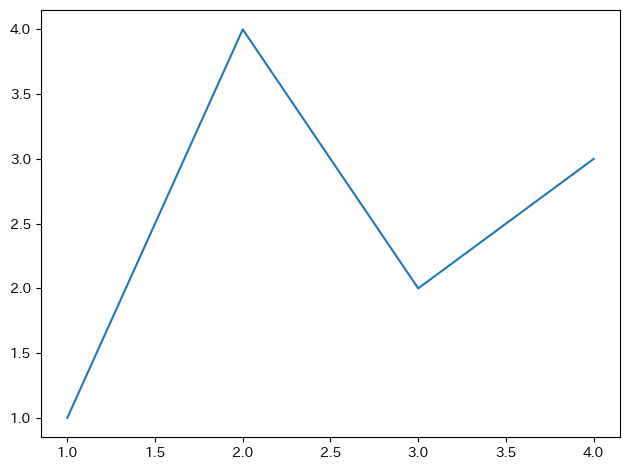

In [30]:
x = np.array([1, 2, 3, 4])   # 入力データ
y = np.array([1, 4, 2, 3])   # 出力データ

plt.figure()
plt.plot(x, y)

plt.tight_layout()
plt.savefig("figure.png")
plt.savefig("figure.jpg")
plt.savefig("figure.pdf")
plt.show()


<span style="font-size: 20px; color: #F08000;">問題2</span>

- 次ページに示すグラフを描画するプログラムを書け
- 必要なデータ（`time.csv`）はmanabaからダウンロードすること
1. pandasライブラリの `read_csv()` 関数を用いてCSVデータ（`time.csv`）を読み込む
2. `time.csv` には `0` 〜 `1` の値がおよそ `0.333` おきに `31` 点分記録されている
   これを時刻 $t$ として，次ページに示すようなグラフのような周期 `1`，振幅 `1` の正弦波 $y(t)$ のグラフを描画する
   ヒント：
   - 正弦波 $y(t)$ は $y(t) = \sin(2\pi t)$ で表せる
   - 正弦関数および円周率 $\pi$ にはNumPyの `np.sin()` 関数および `np.pi` を使う
3. 見栄えが次ページのグラフのようになるように調整する
4. 描画したグラフを `mondai2.png` として保存する


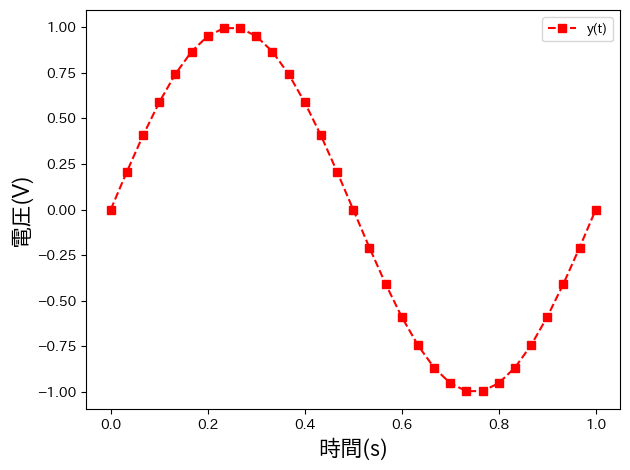

In [37]:
##############################
# 問題2のコードを記入
df=pd.read_csv("time.csv")
value=df["t"].values

plt.figure()
plt.plot(value,np.sin(2*value*np.pi),linestyle="--",color="red",marker="s",label="y(t)")
plt.xlabel("時間(s)",fontsize=16)
plt.ylabel("電圧(V)",fontsize=16)
plt.tight_layout()
plt.legend()
plt.show()
##############################